<a href="https://colab.research.google.com/github/dharris50/Test/blob/master/Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.callbacks import Callback

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras.callbacks import Callback


class LRFinder(Callback):
    """Callback that exponentially adjusts the learning rate after each training batch between start_lr and
    end_lr for a maximum number of batches: max_step. The loss and learning rate are recorded at each step allowing
    visually finding a good learning rate as per https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html via
    the plot method.
    """

    def __init__(self, start_lr: float = 1e-7, end_lr: float = 10, max_steps: int = 100, smoothing=0.9):
        super(LRFinder, self).__init__()
        self.start_lr, self.end_lr = start_lr, end_lr
        self.max_steps = max_steps
        self.smoothing = smoothing
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_begin(self, logs=None):
        self.step, self.best_loss, self.avg_loss, self.lr = 0, 0, 0, 0
        self.lrs, self.losses = [], []

    def on_train_batch_begin(self, batch, logs=None):
        self.lr = self.exp_annealing(self.step)
        tf.keras.backend.set_value(self.model.optimizer.lr, self.lr)

    def on_train_batch_end(self, batch, logs=None):
        logs = logs or {}
        loss = logs.get('loss')
        step = self.step
        if loss:
            self.avg_loss = self.smoothing * self.avg_loss + (1 - self.smoothing) * loss
            smooth_loss = self.avg_loss / (1 - self.smoothing ** (self.step + 1))
            self.losses.append(smooth_loss)
            self.lrs.append(self.lr)

            if step == 0 or loss < self.best_loss:
                self.best_loss = loss

            if smooth_loss > 4 * self.best_loss or tf.math.is_nan(smooth_loss):
                self.model.stop_training = True

        if step == self.max_steps:
            self.model.stop_training = True

        self.step += 1

    def exp_annealing(self, step):
        return self.start_lr * (self.end_lr / self.start_lr) ** (step * 1. / self.max_steps)

    def plot(lrs, losses):
        fig, ax = plt.subplots(1, 1)
        ax.set_ylabel('Loss')
        ax.set_xlabel('Learning Rate (log scale)')
        ax.set_xscale('log')
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.0e'))
        ax.plot(lrs, losses)

Layer  10
Layer  22
Layer  32
Layer  42
Layer  54
Layer  64
Layer  74
Layer  84
Layer  96
Layer  106
Layer  116
Layer  126
Layer  136
Layer  146
Layer  158
Layer  168


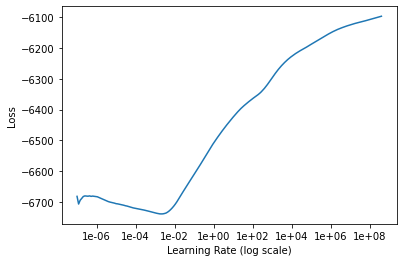

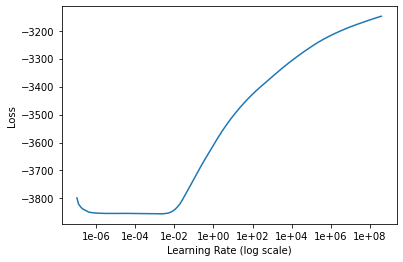

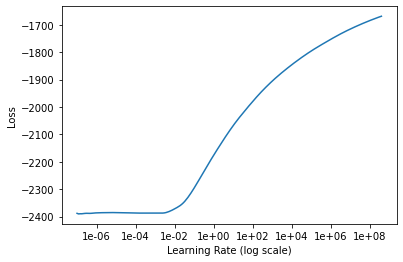

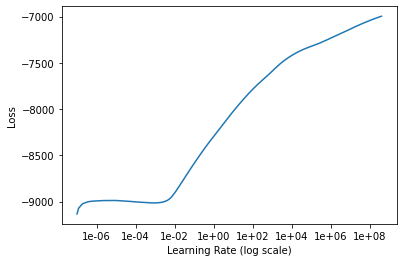

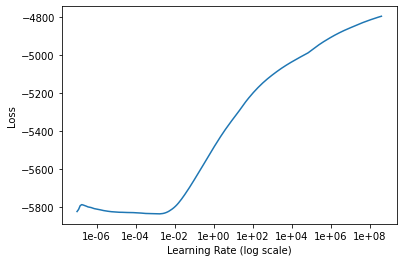

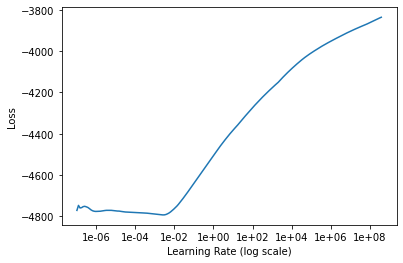

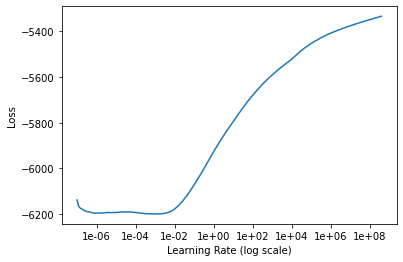

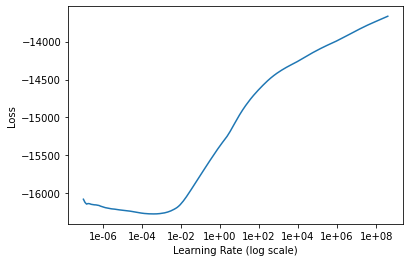

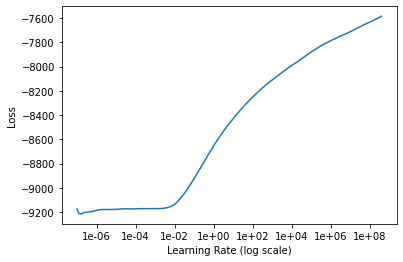

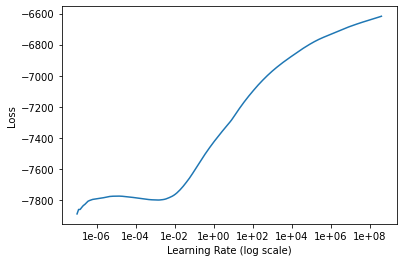

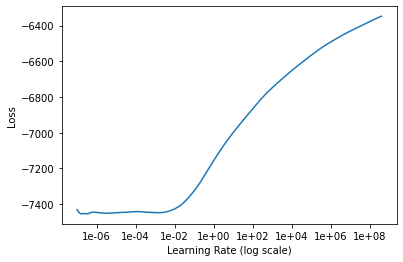

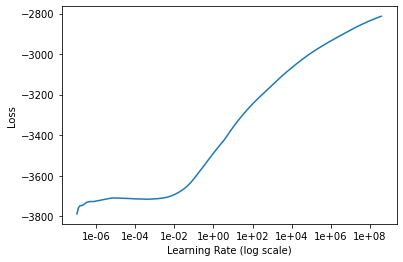

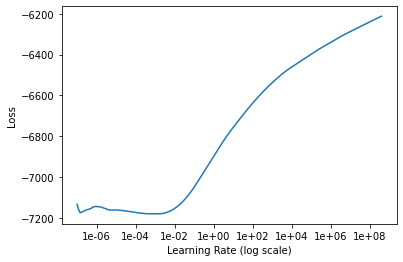

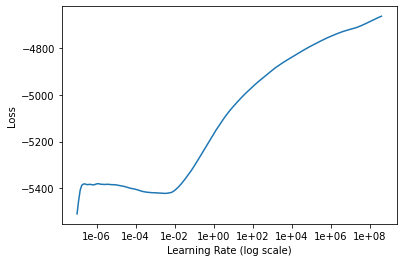

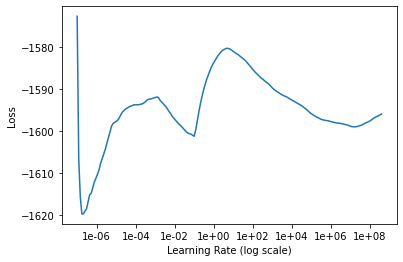

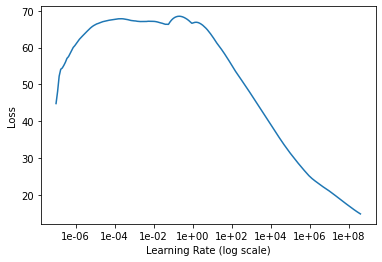

In [ ]:
layers = [10, 22, 32, 42, 54, 64, 74, 84, 96, 106, 116, 126, 136, 146, 158, 168]
l = []
r = []

txt = open("output_lr.txt", "r")
for i in range(len(layers)):
  line = txt.readline()
  loss = ""
  for char in range(len(line)):
    if line[char] is not " ":
      loss += (line[char])
    else:
      l.append(float(loss))
      loss = ""
  line = txt.readline()
  lr = ""
  for char in range(len(line)):
    if line[char] is not " ":
      lr += line[char]
    else:
      r.append(float(lr))
      lr = ""
  print("Layer ", layers[i])
  plot(r, l) 
  l = []
  r = []

txt.close()  